### Env variables

In [84]:
from dotenv import load_dotenv
import os
from FeaturesGetterModule.FeaturesGetter import FeaturesGetter

load_dotenv("dev.env")
API_KEY = os.getenv("COINGLASS_API_KEY")

if not API_KEY:
    raise ValueError("COINGLASS_API_KEY not found in dev.env")

# Создаём экземпляр FeaturesGetter
getter = FeaturesGetter(api_key=API_KEY)

### Getting features

In [57]:
##### GETTER FOR FEAUTURES ######### № 1
import numpy as np
import pandas as pd

# Показывать все колонки
pd.set_option('display.max_columns', None)

# Опционально: не обрезать ширину колонок
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

In [59]:
# Open Interest History
df_oi = getter.get_history(
        endpoint_name="open_interest_history",
        exchange="Binance",
        symbol="BTCUSDT",
        interval="1d",
        prefix="futures_open_interest_history"
    )

In [60]:
# Open Interest Aggregated
df_oi_agg = getter.get_history(
    endpoint_name="open_interest_aggregated",
    symbol="BTC",
    interval="1d",
    prefix="futures_open_interest_aggregated_history"
)

In [61]:
# Open Interest Stablecoin
df_stable_oi = getter.get_history(
    endpoint_name="open_interest_stablecoin",
    exchange_list="Binance",
    symbol="BTC",
    interval="1d",
    prefix="futures_open_interest_aggregated_stablecoin_history"
)

In [62]:
# Open Interest Stablecoin
df_coin_margin = getter.get_history(
    endpoint_name="open_interest_coin_margin",
    exchange_list="Binance",
    symbol="BTC",
    interval="1d",
    prefix="futures_open_interest_aggregated_coin_margin_history"
)

In [63]:
# Funding Rate History
df_funding = getter.get_history(
    endpoint_name="funding_rate_history",
    exchange="Binance",
    symbol="BTCUSDT",
    interval="1d",
    prefix="futures_funding_rate_history"
)

In [64]:
# Funding Rate OI-Weighted
df_oi_weight_funding = getter.get_history(
    endpoint_name="funding_rate_oi_weight",
    symbol="BTC",
    interval="1d",
    prefix="futures_funding_rate_oi_weight_history"
)

In [65]:
# Funding Rate Volume-Weighted
df_vol_weight_funding = getter.get_history(
        endpoint_name="funding_rate_vol_weight",
        symbol="BTC",
        interval="1d",
        prefix="futures_funding_rate_vol_weight_history"
    )

In [66]:
# Global Long/Short Account Ratio
df_ls_accounts = getter.get_history(
    endpoint_name="global_long_short_account_ratio",
    exchange="Binance",
    symbol="BTCUSDT",
    interval="1d",
    prefix="futures_global_long_short_account_ratio_history"
)

In [67]:
# Top Traders Long/Short Account Ratio
df_top_ls_accounts = getter.get_history(
    endpoint_name="top_long_short_account_ratio",
    exchange="Binance",
    symbol="BTCUSDT",
    interval="1d",
    prefix="futures_top_long_short_account_ratio_history"
)

In [68]:
# Top Traders Long/Short Position Ratio
df_top_ls_positions = getter.get_history(
    endpoint_name="top_long_short_position_ratio",
    exchange="Binance",
    symbol="BTCUSDT",
    interval="1d",
    prefix="futures_top_long_short_position_ratio_history"
)

In [69]:
# Net Position History
df_net_pos = getter.get_history(
    endpoint_name="net_position",
    exchange="Binance",
    symbol="BTCUSDT",
    interval="1d",
    prefix="futures_v2_net_position_history"
)

In [70]:
# Liquidation History
df_liq = getter.get_history(
    endpoint_name="liquidation_history",
    exchange="Binance",
    symbol="BTCUSDT",
    interval="1d",
    prefix="futures_liquidation_history"
)

In [71]:
# Liquidation Aggregated
df_liq_agg = getter.get_history(
    endpoint_name="liquidation_aggregated",
    exchange_list="Binance",
    symbol="BTC",
    interval="1d",
    prefix="futures_liquidation_aggregated_history"
)

In [72]:
# Orderbook Ask/Bids History
df_ob = getter.get_history(
    endpoint_name="orderbook_ask_bids",
    exchange="Binance",
    symbol="BTCUSDT",
    interval="1d",
    prefix="futures_orderbook_ask_bids_history"
)

In [73]:
# Orderbook Aggregated
df_ob_agg = getter.get_history(
    endpoint_name="orderbook_aggregated",
    exchange_list="Binance",
    symbol="BTC",
    interval="1d",
    prefix="futures_orderbook_aggregated_ask_bids_history"
)

In [74]:
# Taker Buy/Sell Volume
df_taker = getter.get_history(
    endpoint_name="taker_buy_sell_volume",
    exchange="Binance",
    symbol="BTCUSDT",
    interval="1d",
    prefix="futures_v2_taker_buy_sell_volume_history"
)

In [75]:
# Bitcoin Long-Term Holder Supply
df_lth_supply = getter.get_bitcoin_lth_supply(
    pct_window=30,
    z_window=180,
    slope_window=14,
    prefix="index_btc_lth_supply"
)

In [76]:
# Bitcoin Active Addresses
df_aa = getter.get_bitcoin_active_addresses(
    pct_window=7,
    z_window=180,
    slope_window=14,
    prefix="index_btc_active_addresses"
)

In [77]:
# Bitcoin Short-Term Holder Supply
df_sth_supply = getter.get_bitcoin_sth_supply(
    pct_window=30,
    z_window=180,
    slope_window=14,
    prefix="index_btc_sth_supply"
)

In [78]:
# Taker Buy/Sell Volume Aggregated
df_taker_agg = getter.get_history(
    endpoint_name="taker_buy_sell_volume_aggregated",
    exchange_list="Binance",
    symbol="BTC",
    interval="1d",
    prefix="futures_aggregated_taker_buy_sell_volume_history"
)

In [79]:
# Bitfinex Margin Long/Short
bitfinex_margin_ls_df = getter.get_bitfinex_margin_long_short(
    symbol="BTC",
    interval="1d",
    prefix="bfx_margin"
)

new_names = {
    "bfx_margin__long_quantity": "long_quantity",
    "bfx_margin__short_quantity": "short_quantity"
}

# Применяем
bitfinex_margin_ls_df = bitfinex_margin_ls_df.rename(columns=new_names)

# # Проверяем
# print(bitfinex_margin_ls_df.tail())

In [80]:
# CoinGlass Derivatives Index (CGDI)
futures_cgdi_index_df = getter.get_cgdi_index(
    interval="1d",
    prefix="cgdi"
)

new_names = {
    "cgdi__index_value": "cgdi_index_value",
    "cgdi__log_level": "cgdi_log_level",
    "cgdi__dev_from_base": "cgdi_dev_from_base",
    "cgdi__dev_softsign": "cgdi_dev_softsign",
}

# Применяем
futures_cgdi_index_df = futures_cgdi_index_df.rename(columns=new_names)

# print(futures_cgdi_index_df.tail())

In [81]:
# Coinbase Premium Index
coinbase_premium_df = getter.get_coinbase_premium_index(
    interval="1d",
    prefix="premium"
)

new_names = {
    "premium__premium": "premium",
    "premium__premium_rate": "premium_rate",
    "premium__premium_abs": "cb_premium_abs",
    "premium__premium_softsign": "cb_premium_softsign",
    "premium__premium_rate_bps": "cb_premium_rate_bps",
    "premium__implied_ref_price": "cb_implied_ref_price",
}

# Применяем
coinbase_premium_df = coinbase_premium_df.rename(columns=new_names)

# print(coinbase_premium_df.tail())

In [82]:
# Bitcoin Reserve Risk
df_rr = getter.get_bitcoin_reserve_risk(
    z_window=180,
    slope_window=14,
    prefix="index_btc_reserve_risk"
)

In [83]:
# Spot Price History (OHLCV)
df_spot = getter.get_history(
    endpoint_name="spot_price_history",
    exchange="Binance",
    symbol="BTCUSDT",
    interval="1d",
    prefix=""
)

# lstrip('_') удаляет символ "_" только с левого края строки
df_spot.columns = df_spot.columns.str.lstrip("_")

# print(df_spot.head())

### Merging features

In [27]:
from functools import reduce
import pandas as pd


def _dedupe_by_date(df: pd.DataFrame, how: str = "last") -> pd.DataFrame:
    """
    Убирает дубли по date.
    how:
      - "last": оставляет последнюю строку по date
      - "first": оставляет первую
      - "mean": усредняет все numeric колонки внутри одного date (остальные игнор)
    """
    if df is None or df.empty:
        return df
    if "date" not in df.columns:
        raise ValueError("DataFrame must contain 'date' column")

    df = df.copy()
    df["date"] = df["date"].astype("string")

    if how in ("last", "first"):
        keep = how
        return df.sort_values("date", kind="stable").drop_duplicates("date", keep=keep).reset_index(drop=True)

    if how == "mean":
        num_cols = [c for c in df.columns if c != "date" and pd.api.types.is_numeric_dtype(df[c])]
        # если numeric нет — просто дедыуп по last
        if not num_cols:
            return df.sort_values("date", kind="stable").drop_duplicates("date", keep="last").reset_index(drop=True)
        out = df.groupby("date", as_index=False)[num_cols].mean()
        return out.sort_values("date", kind="stable").reset_index(drop=True)

    raise ValueError("how must be one of: 'last', 'first', 'mean'")


def merge_by_date(dfs: list[pd.DataFrame], how: str = "outer", dedupe: str = "last") -> pd.DataFrame:
    """
    Объединяет список DF по колонке 'date'.
    how: 'outer' (рекомендую) или 'inner'
    dedupe: см. _dedupe_by_date
    """
    # отфильтровать пустые
    cleaned = []
    for df in dfs:
        if df is None or df.empty:
            continue
        cleaned.append(_dedupe_by_date(df, how=dedupe))

    if not cleaned:
        return pd.DataFrame(columns=["date"])

    merged = reduce(lambda left, right: left.merge(right, on="date", how=how), cleaned)
    merged = merged.sort_values("date", kind="stable").reset_index(drop=True)
    return merged


In [55]:
from Get_Features import get_features


# dfs = [
#     df_oi,
#     df_oi_agg,
#     df_stable_oi,
#     df_coin_margin,
#     df_funding,
#     df_oi_weight_funding,
#     df_vol_weight_funding,
#     df_ls_accounts,
#     df_top_ls_accounts,
#     df_top_ls_positions,
#     df_net_pos,
#     df_liq,
#     df_liq_agg,
#     df_ob,
#     df_ob_agg,
#     df_taker,
#     df_taker_agg,
#     bitfinex_margin_ls_df,
#     futures_cgdi_index_df,
#     coinbase_premium_df,
#     df_lth_supply,
#     df_aa,
#     df_sth_supply,
#     df_rr,
#     df_spot
# ]

dfs = get_features(getter, API_KEY)

df_all = merge_by_date(dfs, how="outer", dedupe="last")
df_all

,futures_open_interest_history__open,futures_open_interest_history__high,futures_open_interest_history__low,futures_open_interest_history__close,date,futures_open_interest_aggregated_history__open,futures_open_interest_aggregated_history__high,futures_open_interest_aggregated_history__low,futures_open_interest_aggregated_history__close,futures_open_interest_aggregated_stablecoin_history__open,futures_open_interest_aggregated_stablecoin_history__high,futures_open_interest_aggregated_stablecoin_history__low,futures_open_interest_aggregated_stablecoin_history__close,futures_open_interest_aggregated_coin_margin_history__open,futures_open_interest_aggregated_coin_margin_history__high,futures_open_interest_aggregated_coin_margin_history__low,futures_open_interest_aggregated_coin_margin_history__close,futures_funding_rate_history__open,futures_funding_rate_history__high,futures_funding_rate_history__low,futures_funding_rate_history__close,futures_funding_rate_oi_weight_history__open,futures_funding_rate_oi_weight_history__high,futures_funding_rate_oi_weight_history__low,futures_funding_rate_oi_weight_history__close,futures_funding_rate_vol_weight_history__open,futures_funding_rate_vol_weight_history__high,futures_funding_rate_vol_weight_history__low,futures_funding_rate_vol_weight_history__close,futures_global_long_short_account_ratio_history__global_account_long_percent,futures_global_long_short_account_ratio_history__global_account_short_percent,futures_global_long_short_account_ratio_history__global_account_long_short_ratio,futures_top_long_short_account_ratio_history__top_account_long_percent,futures_top_long_short_account_ratio_history__top_account_short_percent,futures_top_long_short_account_ratio_history__top_account_long_short_ratio,futures_top_long_short_position_ratio_history__top_position_long_percent,futures_top_long_short_position_ratio_history__top_position_short_percent,futures_top_long_short_position_ratio_history__top_position_long_short_ratio,futures_v2_net_position_history__net_long_change,futures_v2_net_position_history__net_short_change,futures_liquidation_history__long_liquidation_usd,futures_liquidation_history__short_liquidation_usd,futures_liquidation_aggregated_history__aggregated_long_liquidation_usd,futures_liquidation_aggregated_history__aggregated_short_liquidation_usd,futures_orderbook_ask_bids_history__bids_usd,futures_orderbook_ask_bids_history__bids_quantity,futures_orderbook_ask_bids_history__asks_usd,futures_orderbook_ask_bids_history__asks_quantity,futures_orderbook_aggregated_ask_bids_history__aggregated_bids_usd,futures_orderbook_aggregated_ask_bids_history__aggregated_bids_quantity,futures_orderbook_aggregated_ask_bids_history__aggregated_asks_usd,futures_orderbook_aggregated_ask_bids_history__aggregated_asks_quantity,futures_v2_taker_buy_sell_volume_history__taker_buy_volume_usd,futures_v2_taker_buy_sell_volume_history__taker_sell_volume_usd,futures_aggregated_taker_buy_sell_volume_history__aggregated_buy_volume_usd,futures_aggregated_taker_buy_sell_volume_history__aggregated_sell_volume_usd,long_quantity,short_quantity,bfx_margin__total_qty,bfx_margin__long_share,bfx_margin__log_long_short,cgdi_index_value,cgdi_log_level,cgdi_dev_from_base,cgdi_dev_softsign,premium,premium_rate,cb_premium_abs,cb_premium_softsign,cb_premium_rate_bps,cb_implied_ref_price,index_btc_lth_supply__price,index_btc_lth_supply__lth_supply,index_btc_lth_supply__supply_pct30,index_btc_lth_supply__supply_z180,index_btc_lth_supply__supply_slope14,index_btc_active_addresses__price,index_btc_active_addresses__active_address_count,index_btc_active_addresses__aa_pct7,index_btc_active_addresses__aa_z180,index_btc_active_addresses__aa_slope14,index_btc_sth_supply__price,index_btc_sth_supply__sth_supply,index_btc_sth_supply__supply_pct30,index_btc_sth_supply__supply_z180,index_btc_sth_supply__supply_slope14,index_btc_reserve_risk__price,index_btc_reserve_risk__reserve_risk_index,index_btc_reserve_risk__movcd,index_btc_reserve_ris

### Adding target column

In [29]:
import numpy as np
import pandas as pd
from functools import reduce

N_DAYS = 1
# ---------- 1) Нормализация спот-колонок ----------
def ensure_spot_prefix(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    mapping = {
        "open": "spot_price_history__open",
        "high": "spot_price_history__high",
        "low": "spot_price_history__low",
        "close": "spot_price_history__close",
        "volume_usd": "spot_price_history__volume_usd",
    }
    # переименуем только если целевой префикс-колонки ещё нет
    rename = {}
    for old, new in mapping.items():
        if old in out.columns and new not in out.columns:
            rename[old] = new
    if rename:
        out = out.rename(columns=rename)
    return out


# ---------- 2) Бинарный таргет на завтра ----------
def add_y_up_1d(df: pd.DataFrame, close_col: str = "spot_price_history__close") -> pd.DataFrame:
    out = df.copy()
    out["date"] = pd.to_datetime(out["date"], errors="coerce")
    out = out.sort_values("date", kind="stable").reset_index(drop=True)

    c = pd.to_numeric(out[close_col], errors="coerce")
    out["y_up_1d"] = (c.shift(-1*N_DAYS) > c).astype("Int64")
    return out

df0 = ensure_spot_prefix(df_all)
df1 = add_y_up_1d(df0, close_col="spot_price_history__close")
df1 = df1.dropna(subset=["y_up_1d", "spot_price_history__close"]).reset_index(drop=True)

## Calculating diff/pct + imbalance for every features

In [30]:
# ---------- 3) Feature engineering: diff/pct + imbalance ----------
def add_engineered_features(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    eps = 1e-12

    # diff/pct для всех numeric (кроме таргета)
    base_numeric = [
        c for c in out.columns
        if c not in {"date", "y_up_1d"}
        and pd.api.types.is_numeric_dtype(out[c])
    ]
    for c in base_numeric:
        out[c + "__diff1"] = out[c].diff(1)
        out[c + "__pct1"] = out[c].pct_change(1)

    # imbalances (если пары колонок есть)
    def _imbalance(num_col_a, num_col_b, new_col):
        if num_col_a in out.columns and num_col_b in out.columns:
            a = pd.to_numeric(out[num_col_a], errors="coerce")
            b = pd.to_numeric(out[num_col_b], errors="coerce")
            out[new_col] = (a - b) / (a + b + eps)

    _imbalance(
        "futures_v2_taker_buy_sell_volume_history__taker_buy_volume_usd",
        "futures_v2_taker_buy_sell_volume_history__taker_sell_volume_usd",
        "feat__taker_imbalance_v2",
    )
    _imbalance(
        "futures_aggregated_taker_buy_sell_volume_history__aggregated_buy_volume_usd",
        "futures_aggregated_taker_buy_sell_volume_history__aggregated_sell_volume_usd",
        "feat__taker_imbalance_agg",
    )
    _imbalance(
        "futures_liquidation_history__short_liquidation_usd",
        "futures_liquidation_history__long_liquidation_usd",
        "feat__liq_imbalance_short_minus_long",
    )
    _imbalance(
        "futures_orderbook_ask_bids_history__bids_usd",
        "futures_orderbook_ask_bids_history__asks_usd",
        "feat__orderbook_imbalance_usd",
    )

    # почистим бесконечности
    out = out.replace([np.inf, -np.inf], np.nan)
    return out

df2 = add_engineered_features(df1)

## Analyzing of correlations

In [31]:
# ---------- 4) Корреляции + (опционально) p-value + FDR ----------
def bh_fdr(pvals: pd.Series) -> pd.Series:
    p = pvals.dropna()
    n = len(p)
    out = pd.Series(np.nan, index=pvals.index, dtype="float64")
    if n == 0:
        return out
    order = np.argsort(p.values)
    ranked = p.values[order]
    q = ranked * n / (np.arange(1, n + 1))
    q = np.minimum.accumulate(q[::-1])[::-1]
    out.loc[p.index[order]] = np.clip(q, 0, 1)
    return out

def corr_report(df: pd.DataFrame, method: str = "pearson", min_n: int = 60) -> pd.DataFrame:
    tmp = df.copy()
    tmp["y_up_1d"] = pd.to_numeric(tmp["y_up_1d"], errors="coerce")

    features = [
        c for c in tmp.columns
        if c not in {"date", "y_up_1d"}
        and pd.api.types.is_numeric_dtype(tmp[c])
    ]

    # быстрый corr (без p-values)
    corr = tmp[features].corrwith(tmp["y_up_1d"], method=method)
    res = corr.rename("corr").to_frame()
    res["abs_corr"] = res["corr"].abs()

    # n по каждой фиче
    y = tmp["y_up_1d"]
    n_list = []
    for c in features:
        m = tmp[c].notna() & y.notna()
        n_list.append(int(m.sum()))
    res["n"] = n_list

    # p-values если доступен scipy
    try:
        from scipy.stats import pearsonr, spearmanr
        pvals = []
        for c in features:
            m = tmp[c].notna() & y.notna()
            if m.sum() < min_n:
                pvals.append(np.nan)
                continue
            x = pd.to_numeric(tmp.loc[m, c], errors="coerce")
            yy = tmp.loc[m, "y_up_1d"]
            if method == "pearson":
                _, p = pearsonr(x, yy)
            else:
                _, p = spearmanr(x, yy)
            pvals.append(p)
        res["p_value"] = pvals
        res["q_value_fdr"] = bh_fdr(res["p_value"])
    except Exception:
        pass

    res = (
        res.reset_index()
           .rename(columns={"index": "feature"})
           .sort_values("abs_corr", ascending=False)
           .reset_index(drop=True)
    )
    return res

# ===================== RUN =====================
pear = corr_report(df2, method="pearson", min_n=60)
spear = corr_report(df2, method="spearman", min_n=60)

print("Class balance y_up_1d:")
print(df2["y_up_1d"].value_counts(dropna=False), "\nUp-rate:", float(df2["y_up_1d"].mean()))

print("\nTop-30 Pearson:")
print(pear.head(30))

print("\nTop-30 Spearman:")
print(spear.head(30))

# если p_value/q_value_fdr есть — удобно посмотреть, что реально значимо
if "q_value_fdr" in pear.columns:
    print("\nPearson: features with q_value_fdr <= 0.10 (если есть):")
    print(pear[pear["q_value_fdr"] <= 0.10].head(50))


Class balance y_up_1d:
y_up_1d
1    508
0    492
Name: count, dtype: Int64 
Up-rate: 0.508

Top-30 Pearson:
                                                                                   feature  \
0                                                    index_btc_reserve_risk__log_rr__diff1   
1                                                        index_btc_lth_supply__price__pct1   
2                                                      index_btc_reserve_risk__price__pct1   
3                                                        index_btc_sth_supply__price__pct1   
4                                         index_btc_reserve_risk__reserve_risk_index__pct1   
5                                                     index_btc_reserve_risk__log_rr__pct1   
6                                    futures_open_interest_aggregated_history__close__pct1   
7          futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1   
8                                             

In [32]:
df_ml = df_all.copy()
df_ml["date"] = pd.to_datetime(df_ml["date"], errors="coerce")
df_ml = df_ml.sort_values("date").reset_index(drop=True)

close = pd.to_numeric(df_ml["close"], errors="coerce")
df_ml["y_up_1d"] = (close.shift(-1*N_DAYS) > close).astype("Int64")

df_ml = df_ml.dropna(subset=["y_up_1d", "close"]).reset_index(drop=True)

In [33]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr

def bh_fdr(pvals: pd.Series) -> pd.Series:
    """Benjamini–Hochberg FDR."""
    p = pvals.dropna()
    n = len(p)
    if n == 0:
        return pvals
    order = np.argsort(p.values)
    ranked = p.values[order]
    q = ranked * n / (np.arange(1, n+1))
    q = np.minimum.accumulate(q[::-1])[::-1]
    out = pd.Series(np.nan, index=pvals.index, dtype="float64")
    out.loc[p.index[order]] = np.clip(q, 0, 1)
    return out

def corr_table_with_pvalues(df: pd.DataFrame, target="y_up_1d", method="pearson") -> pd.DataFrame:
    y = pd.to_numeric(df[target], errors="coerce")
    num_cols = [c for c in df.columns if c not in {"date", target} and pd.api.types.is_numeric_dtype(df[c])]
    rows = []
    for c in num_cols:
        x = pd.to_numeric(df[c], errors="coerce")
        m = x.notna() & y.notna()
        if m.sum() < 30:
            continue
        if method == "pearson":
            r, p = pearsonr(x[m], y[m])
        else:
            r, p = spearmanr(x[m], y[m])
        rows.append((c, r, p, m.sum()))
    res = pd.DataFrame(rows, columns=["feature", "corr", "p_value", "n"])
    res["abs_corr"] = res["corr"].abs()
    res["q_value_fdr"] = bh_fdr(res["p_value"])
    return res.sort_values("abs_corr", ascending=False).reset_index(drop=True)

corr_p = corr_table_with_pvalues(df_ml, method="pearson")
corr_s = corr_table_with_pvalues(df_ml, method="spearman")

# print(corr_p.head(30))
# print(corr_s.head(30))


In [34]:
df_feat = df_ml.copy()

# 1) Изменения (дельты) и % изменения для ключевых фич
for c in df_feat.columns:
    if c in {"date", "y_up_1d"}:
        continue
    if pd.api.types.is_numeric_dtype(df_feat[c]):
        df_feat[c + "__diff1"] = df_feat[c].diff(1)
        df_feat[c + "__pct1"] = df_feat[c].pct_change(1)

# 2) Дисбалансы (пример: taker, liquidation, orderbook)
eps = 1e-12

if "futures_v2_taker_buy_sell_volume_history__taker_buy_volume_usd" in df_feat.columns and \
   "futures_v2_taker_buy_sell_volume_history__taker_sell_volume_usd" in df_feat.columns:
    buy = df_feat["futures_v2_taker_buy_sell_volume_history__taker_buy_volume_usd"]
    sell = df_feat["futures_v2_taker_buy_sell_volume_history__taker_sell_volume_usd"]
    df_feat["taker_imbalance"] = (buy - sell) / (buy + sell + eps)

if "futures_liquidation_history__long_liquidation_usd" in df_feat.columns and \
   "futures_liquidation_history__short_liquidation_usd" in df_feat.columns:
    L = df_feat["futures_liquidation_history__long_liquidation_usd"]
    S = df_feat["futures_liquidation_history__short_liquidation_usd"]
    df_feat["liq_imbalance"] = (S - L) / (S + L + eps)  # знак можно менять под твою логику

if "futures_orderbook_ask_bids_history__bids_usd" in df_feat.columns and \
   "futures_orderbook_ask_bids_history__asks_usd" in df_feat.columns:
    b = df_feat["futures_orderbook_ask_bids_history__bids_usd"]
    a = df_feat["futures_orderbook_ask_bids_history__asks_usd"]
    df_feat["ob_imbalance_usd"] = (b - a) / (b + a + eps)

df_feat = df_feat.replace([np.inf, -np.inf], np.nan).dropna(subset=["y_up_1d"]).reset_index(drop=True)

corr_p2 = corr_table_with_pvalues(df_feat, method="pearson")

# print(corr_p2.head(30))


In [35]:
import numpy as np
import pandas as pd

def group_effect_report(df: pd.DataFrame, target="y_up_1d", top_n=30) -> pd.DataFrame:
    y = pd.to_numeric(df[target], errors="coerce")
    feats = [c for c in df.columns if c not in {"date", target} and pd.api.types.is_numeric_dtype(df[c])]

    rows = []
    for f in feats:
        x = pd.to_numeric(df[f], errors="coerce")
        m = x.notna() & y.notna()
        if m.sum() < 60:
            continue
        x0 = x[m & (y == 0)]
        x1 = x[m & (y == 1)]
        if len(x0) < 20 or len(x1) < 20:
            continue

        mean0, mean1 = float(x0.mean()), float(x1.mean())
        std0, std1 = float(x0.std(ddof=1)), float(x1.std(ddof=1))
        pooled = np.sqrt(((len(x0)-1)*std0**2 + (len(x1)-1)*std1**2) / (len(x0)+len(x1)-2))
        d = (mean1 - mean0) / (pooled + 1e-12)

        rows.append((f, mean1, mean0, mean1-mean0, abs(d), d, len(x1), len(x0)))

    res = pd.DataFrame(rows, columns=["feature","mean_y1","mean_y0","lift","abs_cohen_d","cohen_d","n_y1","n_y0"])
    return res.sort_values("abs_cohen_d", ascending=False).head(top_n).reset_index(drop=True)

effect_tbl = group_effect_report(df2, target="y_up_1d", top_n=30)
print(effect_tbl)


                                                                                   feature  \
0                                                    index_btc_reserve_risk__log_rr__diff1   
1                                                        index_btc_lth_supply__price__pct1   
2                                                      index_btc_reserve_risk__price__pct1   
3                                                        index_btc_sth_supply__price__pct1   
4                                         index_btc_reserve_risk__reserve_risk_index__pct1   
5                                                     index_btc_reserve_risk__log_rr__pct1   
6                                    futures_open_interest_aggregated_history__close__pct1   
7          futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1   
8                                                          spot_price_history__close__pct1   
9                                        index_btc_reserve_r

In [36]:
# убедись, что нет NaN в date и что даты монотонны
df2 = df2.sort_values("date").reset_index(drop=True)
assert df2["date"].isna().sum() == 0
assert (pd.to_datetime(df2["date"]).diff().dropna() >= pd.Timedelta(0)).all()

# проверка что таргет действительно завтрашний close относительно сегодняшнего
c = df2["spot_price_history__close"]
y_check = (c.shift(-1*N_DAYS) > c).astype("Int64")
print("y совпадает:", (y_check == df2["y_up_1d"]).mean())


y совпадает: 1.0


## Filteting features with small coverage

In [37]:
def add_coverage(effect_tbl: pd.DataFrame, df: pd.DataFrame) -> pd.DataFrame:
    eff = effect_tbl.copy()
    eff["coverage"] = eff["feature"].apply(lambda c: float(df[c].notna().mean()) if c in df.columns else 0.0)
    return eff.sort_values(["abs_cohen_d", "coverage"], ascending=[False, False]).reset_index(drop=True)

effect_tbl_cov = add_coverage(effect_tbl, df2)   # df2 = датафрейм с y_up_1d и engineered features
print(effect_tbl_cov.head(30))

# Например, оставим только фичи с покрытием >= 0.85
good_features = effect_tbl_cov.query("coverage >= 0.85")["feature"].tolist()
print("features kept:", len(good_features))

                                                                                   feature  \
0                                                    index_btc_reserve_risk__log_rr__diff1   
1                                                        index_btc_lth_supply__price__pct1   
2                                                      index_btc_reserve_risk__price__pct1   
3                                                        index_btc_sth_supply__price__pct1   
4                                         index_btc_reserve_risk__reserve_risk_index__pct1   
5                                                     index_btc_reserve_risk__log_rr__pct1   
6                                    futures_open_interest_aggregated_history__close__pct1   
7          futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1   
8                                                          spot_price_history__close__pct1   
9                                        index_btc_reserve_r

## Walk-Forward Cross-Validation

In [38]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

def walk_forward_logreg(
    df: pd.DataFrame,
    features: list[str],
    target: str = "y_up_1d",
    n_splits: int = 5,
    thr: float = 0.5,
):
    d = df.copy()
    d["date"] = pd.to_datetime(d["date"], errors="coerce")
    d = d.sort_values("date", kind="stable").reset_index(drop=True)

    X = d[features].copy()
    y = pd.to_numeric(d[target], errors="coerce")

    m = y.notna() & X.notna().any(axis=1)
    X, y = X.loc[m].reset_index(drop=True), y.loc[m].astype(int).reset_index(drop=True)

    tscv = TimeSeriesSplit(n_splits=n_splits)

    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=3000, class_weight="balanced")),
    ])

    accs, aucs, precs, recs = [], [], [], []
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        pipe.fit(X_train, y_train)
        proba = pipe.predict_proba(X_test)[:, 1]
        pred = (proba >= thr).astype(int)

        accs.append(accuracy_score(y_test, pred))
        precs.append(precision_score(y_test, pred, zero_division=0))
        recs.append(recall_score(y_test, pred, zero_division=0))

        # ROC AUC: если один класс — ставим nan, но длину сохраняем
        if len(np.unique(y_test)) == 2:
            aucs.append(roc_auc_score(y_test, proba))
        else:
            aucs.append(np.nan)

    return {
        "n_features": len(features),
        "thr": thr,
        "acc_mean": float(np.nanmean(accs)),
        "acc_splits": accs,
        "precision_mean": float(np.nanmean(precs)),
        "precision_splits": precs,
        "recall_mean": float(np.nanmean(recs)),
        "recall_splits": recs,
        "auc_mean": float(np.nanmean(aucs)),
        "auc_splits": aucs,
    }


def print_metrics(res: dict, title: str = "RESULTS"):
    print(f"\n{title}")
    print(f"thr={res['thr']} | n_features={res['n_features']}")
    print(f"Precision: {res['precision_mean']:.4f} | splits: {np.round(res['precision_splits'], 4)}")
    print(f"Recall:    {res['recall_mean']:.4f} | splits: {np.round(res['recall_splits'], 4)}")
    print(f"ROC AUC:   {res['auc_mean']:.4f} | splits: {np.round(res['auc_splits'], 4)}")


## Range / Volatility Model

In [39]:
# Range model

def add_range_target(
    df: pd.DataFrame,
    high_col: str,
    low_col: str,
    close_col: str | None = None,   # если хочешь дополнительно range_pct
    date_col: str = "date",
    ma_window: int = 14,
    horizon: int = 1,               # N дней вперед для таргета
    use_pct: bool = False,          # False: high-low, True: (high-low)/close
    baseline_shift: int = 1,        # 1 => SMA только по прошлым дням (без leakage)
    out_target_col: str | None = None,
) -> pd.DataFrame:
    d = df.copy()
    d[date_col] = pd.to_datetime(d[date_col], errors="coerce")
    d = d.sort_values(date_col, kind="stable").reset_index(drop=True)

    hi = pd.to_numeric(d[high_col], errors="coerce")
    lo = pd.to_numeric(d[low_col], errors="coerce")
    rng = hi - lo

    d["range_abs"] = rng

    if close_col is not None:
        close = pd.to_numeric(d[close_col], errors="coerce")
        d["range_pct"] = rng / close
    else:
        d["range_pct"] = np.nan

    # выбираем, на чем строим таргет и baseline
    base_series = d["range_pct"] if use_pct else d["range_abs"]
    base_name = "range_pct" if use_pct else "range_abs"

    # baseline SMA(14) — только прошлое (shift=1)
    d[f"{base_name}_ma{ma_window}"] = (
        base_series.shift(baseline_shift).rolling(ma_window, min_periods=ma_window).mean()
    )

    # будущий range на горизонте N
    fut = base_series.shift(-horizon)

    # бинарный таргет: будущий range выше/ниже текущей SMA(14)
    y = np.where(
        fut.notna() & d[f"{base_name}_ma{ma_window}"].notna(),
        (fut > d[f"{base_name}_ma{ma_window}"]).astype(int),
        np.nan,
    )

    if out_target_col is None:
        out_target_col = f"y_range_up_{base_name}_N{horizon}_ma{ma_window}"

    d[out_target_col] = y
    return d


In [40]:
# BASE фичи (твои) для одного дня
base_feats = [
    "spot_price_history__close__pct1",
    "spot_price_history__close__diff1",
    "futures_open_interest_aggregated_history__close__pct1",
    "futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1",
    "futures_global_long_short_account_ratio_history__global_account_long_percent__pct1"
    "futures_top_long_short_account_ratio_history__top_account_long_short_ratio__pct1"
    "premium__diff1",
    "cb_premium_abs"
    ]

In [41]:
HIGH_COL  = "spot_price_history__high"
LOW_COL   = "spot_price_history__low"
CLOSE_COL = "spot_price_history__close"


d_rngp = add_range_target(
    df2,
    high_col=HIGH_COL,
    low_col=LOW_COL,
    close_col=CLOSE_COL,
    ma_window=14,
    horizon=1,
    use_pct=True,      # (high-low)/close
    baseline_shift=1,
)

target_col = "y_range_up_range_pct_N1_ma14"

range_feats = [
    "range_pct",
    "range_pct_ma14",
]
feat_set = [c for c in (base_feats + range_feats) if c in d_rngp.columns]

# res_rngp = walk_forward_logreg(d_rngp, features=feat_set, target=target_col, n_splits=5, thr=0.5)
# print(res_rngp)
res_rngp = walk_forward_logreg(d_rngp, features=feat_set, target=target_col, n_splits=5, thr=0.5)
res_rngp

{'n_features': 7,
 'thr': 0.5,
 'acc_mean': 0.6182926829268293,
 'acc_splits': [0.5853658536585366,
  0.5975609756097561,
  0.6402439024390244,
  0.6646341463414634,
  0.6036585365853658],
 'precision_mean': 0.5473866432075386,
 'precision_splits': [0.5333333333333333,
  0.5074626865671642,
  0.5714285714285714,
  0.5606060606060606,
  0.5641025641025641],
 'recall_mean': 0.4979425028068766,
 'recall_splits': [0.22857142857142856,
  0.5074626865671642,
  0.5797101449275363,
  0.5873015873015873,
  0.5866666666666667],
 'auc_mean': 0.6706521305523414,
 'auc_splits': [0.6331306990881459,
  0.6285582397291891,
  0.7159420289855072,
  0.7190004714757189,
  0.6566292134831461]}

## Feature Engineering: Lags

In [48]:
# prediction models
def add_lags(df: pd.DataFrame, cols: list[str], lags=(1, 2)) -> pd.DataFrame:
    out = df.copy()
    out["date"] = pd.to_datetime(out["date"], errors="coerce")
    out = out.sort_values("date", kind="stable").reset_index(drop=True)
    for c in cols:
        if c in out.columns:
            x = pd.to_numeric(out[c], errors="coerce")
            for L in lags:
                out[f"{c}__lag{L}"] = x.shift(L)
    return out

# base_feats = ['index_btc_reserve_risk__log_rr__diff1',
#        'index_btc_sth_supply__price__pct1',
#        'index_btc_reserve_risk__price__pct1',
#        'index_btc_lth_supply__price__pct1',
#        'index_btc_reserve_risk__reserve_risk_index__pct1',
#        'futures_open_interest_aggregated_history__close__pct1',
#        'index_btc_reserve_risk__log_rr__pct1',
#        'spot_price_history__close__pct1',
#        'index_btc_reserve_risk__reserve_risk_index__diff1',
#        'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1',
#        'futures_funding_rate_history__open__pct1',
#        'index_btc_active_addresses__aa_slope14__pct1'
#        ]

# base фичи для 3 дней
# base_feats = [
#     "spot_price_history__close__pct1",
#     "spot_price_history__close__diff1",
#     'feat__orderbook_imbalance_usd',
#     'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1'
#     'futures_open_interest_aggregated_stablecoin_history__close',
#     'futures_open_interest_aggregated_stablecoin_history__low',
#     'cgdi_log_level', 'cgdi_dev_softsign', 'cgdi_dev_from_base',
#     'cgdi_index_value'
# ]

# base фичи для 4 days
# base_feats = [
#     'futures_open_interest_aggregated_stablecoin_history__close',
#        'feat__orderbook_imbalance_usd',
#        'futures_open_interest_aggregated_stablecoin_history__low',
#        'futures_open_interest_history__low__diff1',
#        'futures_open_interest_aggregated_stablecoin_history__open',
#        'cgdi_dev_from_base', 'cgdi_index_value',
#        'futures_open_interest_aggregated_stablecoin_history__high',
#        'cgdi_log_level', 'cgdi_dev_softsign'
# ]

# base features for 5 days
# base_feats = [
#     'cgdi_dev_from_base', 'cgdi_index_value', 'cgdi_log_level',
#        'cgdi_dev_softsign',
#        'futures_open_interest_aggregated_stablecoin_history__close',
#        'futures_open_interest_aggregated_stablecoin_history__low',
#        'futures_open_interest_aggregated_stablecoin_history__high',
#        'futures_open_interest_aggregated_stablecoin_history__open',
#        'futures_orderbook_aggregated_ask_bids_history__aggregated_asks_usd__pct1',
#        'futures_orderbook_ask_bids_history__asks_usd__pct1'
# ]

# base features for 7 days
# base_feats = [
#     'cgdi_dev_from_base', 'cgdi_index_value', 'cgdi_log_level',
#        'cgdi_dev_softsign',
#        'futures_open_interest_aggregated_stablecoin_history__close',
#        'futures_open_interest_aggregated_stablecoin_history__low',
#        'futures_open_interest_aggregated_stablecoin_history__high',
#        'futures_open_interest_aggregated_stablecoin_history__open',
#        'futures_orderbook_aggregated_ask_bids_history__aggregated_asks_usd__pct1',
#        'futures_orderbook_ask_bids_history__asks_usd__pct1'
# ]

base_feats = [c for c in base_feats if c in df2.columns]

# какие из них деривативные (кроме спота) — на них делаем лаги
deriv = [c for c in base_feats if not c.startswith("spot_price_history__")]

df_lag = add_lags(df2, cols=deriv, lags=(1, 2, 3, 5))

lag_feats = (
    base_feats
    + [f"{c}__lag1" for c in deriv]
    + [f"{c}__lag2" for c in deriv]
    + [f"{c}__lag3" for c in deriv]
    + [f"{c}__lag5" for c in deriv]  # было lag4, но ты создаёшь lag5
)
lag_feats = [c for c in lag_feats if c in df_lag.columns]

print("BASE feats:", base_feats)
print("LAG feats:", lag_feats)

res_base = walk_forward_logreg(df2, base_feats, n_splits=5, thr=0.5)
res_lag  = walk_forward_logreg(df_lag, lag_feats, n_splits=5, thr=0.5)

print("\nBASE:", res_base)
print("\nLAG :", res_lag)


BASE feats: ['spot_price_history__close__pct1', 'spot_price_history__close__diff1', 'futures_open_interest_aggregated_history__close__pct1', 'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1', 'cb_premium_abs']
LAG feats: ['spot_price_history__close__pct1', 'spot_price_history__close__diff1', 'futures_open_interest_aggregated_history__close__pct1', 'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1', 'cb_premium_abs', 'futures_open_interest_aggregated_history__close__pct1__lag1', 'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1__lag1', 'cb_premium_abs__lag1', 'futures_open_interest_aggregated_history__close__pct1__lag2', 'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1__lag2', 'cb_premium_abs__lag2', 'futures_open_interest_aggregated_history__close__pct1__lag3', 'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1__lag3', 'cb_premium_a

## Hyperparameter Tuning

In [49]:
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

import numpy as np
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score


# --------- CV eval (one config) ----------
def walk_forward_logreg_cfg(
    df: pd.DataFrame,
    features: list[str],
    target: str = "y_up_1d",
    n_splits: int = 5,
    thr: float = 0.5,
    imputer_strategy: str = "mean",          # "mean" | "median"
    C: float = 1.0,
    penalty: str = "l2",                     # "l1" | "l2" | "elasticnet"
    solver: str = "lbfgs",                   # lbfgs/liblinear/saga
    l1_ratio: float | None = None,           # only for elasticnet+saga
    class_weight: str | dict | None = "balanced",
):
    d = df.copy()
    d["date"] = pd.to_datetime(d["date"], errors="coerce")
    d = d.sort_values("date", kind="stable").reset_index(drop=True)

    X = d[features].copy()
    y = pd.to_numeric(d[target], errors="coerce")

    m = y.notna() & X.notna().any(axis=1)
    X, y = X.loc[m].reset_index(drop=True), y.loc[m].astype(int).reset_index(drop=True)

    tscv = TimeSeriesSplit(n_splits=n_splits)

    clf_kwargs = dict(
        max_iter=4000,
        class_weight=class_weight,
        C=float(C),
        penalty=penalty,
        solver=solver,
    )
    if penalty == "elasticnet":
        clf_kwargs["l1_ratio"] = float(l1_ratio if l1_ratio is not None else 0.5)

    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy=imputer_strategy)),
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(**clf_kwargs)),
    ])

    accs, aucs, precs, recs = [], [], [], []
    for tr, te in tscv.split(X):
        X_tr, X_te = X.iloc[tr], X.iloc[te]
        y_tr, y_te = y.iloc[tr], y.iloc[te]

        pipe.fit(X_tr, y_tr)
        proba = pipe.predict_proba(X_te)[:, 1]
        pred = (proba >= thr).astype(int)

        accs.append(accuracy_score(y_te, pred))
        precs.append(precision_score(y_te, pred, zero_division=0))
        recs.append(recall_score(y_te, pred, zero_division=0))

        if y_te.nunique() == 2:
            aucs.append(roc_auc_score(y_te, proba))

    return {
        "thr": thr,
        "imputer": imputer_strategy,
        "C": float(C),
        "penalty": penalty,
        "solver": solver,
        "l1_ratio": None if penalty != "elasticnet" else float(clf_kwargs["l1_ratio"]),
        "n_features": len(features),
        "acc_mean": float(np.mean(accs)),
        "precision_mean": float(np.mean(precs)),
        "recall_mean": float(np.mean(recs)),
        "auc_mean": float(np.mean(aucs)) if aucs else np.nan,
        "acc_splits": accs,
        "auc_splits": aucs,
    }


# --------- Simple grid search ----------
def tune_logreg_timecv(
    df: pd.DataFrame,
    features: list[str],
    target: str = "y_up_1d",
    n_splits: int = 5,
    score: str = "auc",          # "auc" | "acc" | "precision" | "recall"
    topk: int = 10,
):
    # небольшая, но полезная сетка
    grid = []

    # L2 (обычно лучший дефолт)
    for imp in ["mean", "median"]:
        for thr in [0.5, 0.52, 0.55]:
            for C in [0.05, 0.1, 0.3, 1.0, 3.0, 10.0]:
                grid.append(dict(imputer_strategy=imp, thr=thr, C=C, penalty="l2", solver="lbfgs", l1_ratio=None))

    # L1 (saga)
    for imp in ["mean", "median"]:
        for thr in [0.5, 0.52, 0.55]:
            for C in [0.05, 0.1, 0.3, 1.0, 3.0]:
                grid.append(dict(imputer_strategy=imp, thr=thr, C=C, penalty="l1", solver="saga", l1_ratio=None))

    # ElasticNet (saga)
    for imp in ["mean", "median"]:
        for thr in [0.5, 0.52, 0.55]:
            for C in [0.05, 0.1, 0.3, 1.0, 3.0]:
                for l1r in [0.2, 0.5, 0.8]:
                    grid.append(dict(imputer_strategy=imp, thr=thr, C=C, penalty="elasticnet", solver="saga", l1_ratio=l1r))

    rows = []
    for cfg in tqdm(grid):
        try:
            r = walk_forward_logreg_cfg(
                df=df,
                features=features,
                target=target,
                n_splits=n_splits,
                thr=cfg["thr"],
                imputer_strategy=cfg["imputer_strategy"],
                C=cfg["C"],
                penalty=cfg["penalty"],
                solver=cfg["solver"],
                l1_ratio=cfg["l1_ratio"],
            )
            rows.append(r)
        except Exception as e:
            # некоторые комбинации могут падать (редко, но бывает) — просто пропускаем
            continue

    res = pd.DataFrame(rows)

    key = {
        "auc": "auc_mean",
        "acc": "acc_mean",
        "precision": "precision_mean",
        "recall": "recall_mean",
    }[score]

    res = res.sort_values(key, ascending=False).reset_index(drop=True)
    return res.head(topk), res


# -------------------- RUN --------------------
print("BASE feats:", base_feats)
print("LAG  feats:", lag_feats)

top_base, all_base = tune_logreg_timecv(df2, base_feats, target="y_up_1d", n_splits=5, score="auc", topk=10)
top_lag,  all_lag  = tune_logreg_timecv(df_lag, lag_feats, target="y_up_1d", n_splits=5, score="auc", topk=10)

print("\nTOP BASE by AUC:")
print(top_base[["auc_mean","acc_mean","precision_mean","recall_mean","thr","imputer","penalty","solver","C","l1_ratio","n_features"]])

print("\nTOP LAG by AUC:")
print(top_lag[["auc_mean","acc_mean","precision_mean","recall_mean","thr","imputer","penalty","solver","C","l1_ratio","n_features"]])

# если хочешь сохранить лучшую конфигурацию:
best = top_lag.iloc[0].to_dict() if len(top_lag) else top_base.iloc[0].to_dict()
print("\nBEST CONFIG:", {k: best[k] for k in ["auc_mean","thr","imputer","penalty","solver","C","l1_ratio"]})


BASE feats: ['spot_price_history__close__pct1', 'spot_price_history__close__diff1', 'futures_open_interest_aggregated_history__close__pct1', 'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1', 'cb_premium_abs']
LAG  feats: ['spot_price_history__close__pct1', 'spot_price_history__close__diff1', 'futures_open_interest_aggregated_history__close__pct1', 'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1', 'cb_premium_abs', 'futures_open_interest_aggregated_history__close__pct1__lag1', 'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1__lag1', 'cb_premium_abs__lag1', 'futures_open_interest_aggregated_history__close__pct1__lag2', 'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1__lag2', 'cb_premium_abs__lag2', 'futures_open_interest_aggregated_history__close__pct1__lag3', 'futures_liquidation_aggregated_history__aggregated_short_liquidation_usd__diff1__lag3', 'cb_premium_

100%|███████████████████████████████████████████████████████████████| 156/156 [00:12<00:00, 12.85it/s]


TOP BASE by AUC:
   auc_mean  acc_mean  precision_mean  recall_mean   thr imputer penalty  \
0  0.548220  0.526506        0.573474     0.569596  0.50  median      l2   
1  0.548220  0.537349        0.596163     0.420482  0.52  median      l2   
2  0.548220  0.521687        0.597536     0.234791  0.55  median      l2   
3  0.548187  0.537349        0.596163     0.420482  0.52    mean      l2   
4  0.548187  0.521687        0.597536     0.234791  0.55    mean      l2   
5  0.548187  0.526506        0.573474     0.569596  0.50    mean      l2   
6  0.548142  0.525301        0.563440     0.575378  0.50    mean      l2   
7  0.548142  0.525301        0.607653     0.239110  0.55    mean      l2   
8  0.548142  0.537349        0.592633     0.421945  0.52    mean      l2   
9  0.548111  0.525301        0.607653     0.239110  0.55  median      l2   

  solver     C  l1_ratio  n_features  
0  lbfgs   3.0       NaN           5  
1  lbfgs   3.0       NaN           5  
2  lbfgs   3.0       NaN    

## Out-of-Sample Evaluation

In [50]:
import numpy as np
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score


def oos_predictions_logreg(df: pd.DataFrame, features: list[str], target="y_up_1d", n_splits=5):
    d = df.copy()
    d["date"] = pd.to_datetime(d["date"], errors="coerce")
    d = d.sort_values("date", kind="stable").reset_index(drop=True)

    X = d[features].copy()
    y = pd.to_numeric(d[target], errors="coerce")

    m = y.notna() & X.notna().any(axis=1)
    X = X.loc[m].reset_index(drop=True)
    y = y.loc[m].astype(int).reset_index(drop=True)
    dates = d.loc[m, "date"].reset_index(drop=True)

    tscv = TimeSeriesSplit(n_splits=n_splits)

    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=3000, class_weight="balanced")),
    ])

    proba_oos = np.full(len(X), np.nan)
    fold_id = np.full(len(X), -1, dtype=int)

    for i, (tr, te) in enumerate(tscv.split(X), start=1):
        pipe.fit(X.iloc[tr], y.iloc[tr])
        p = pipe.predict_proba(X.iloc[te])[:, 1]
        proba_oos[te] = p
        fold_id[te] = i

    out = pd.DataFrame({
        "date": dates,
        "y": y,
        "p_up": proba_oos,
        "fold": fold_id,
    }).dropna(subset=["p_up"]).reset_index(drop=True)

    # общие метрики
    auc = roc_auc_score(out["y"], out["p_up"])
    acc = accuracy_score(out["y"], (out["p_up"] >= 0.5).astype(int))
    return out, auc, acc


def threshold_report(oos: pd.DataFrame, up_thr=0.55, down_thr=0.45):
    # long if p>=up_thr, short if p<=down_thr, else no trade
    p = oos["p_up"]
    y = oos["y"]

    take_long = p >= up_thr
    take_short = p <= down_thr
    take = take_long | take_short

    correct = (take_long & (y == 1)) | (take_short & (y == 0))

    rep = {
        "up_thr": up_thr,
        "down_thr": down_thr,
        "coverage_trades": float(take.mean()),
        "winrate_on_trades": float(correct[take].mean()) if take.any() else np.nan,
        "n_trades": int(take.sum()),
        "n_long": int(take_long.sum()),
        "n_short": int(take_short.sum()),
        "avg_p_up_all": float(p.mean()),
        "avg_p_up_long": float(p[take_long].mean()) if take_long.any() else np.nan,
        "avg_p_up_short": float(p[take_short].mean()) if take_short.any() else np.nan,
    }
    return rep


# ----- run -----
oos, auc, acc = oos_predictions_logreg(df2, base_feats, n_splits=5)
print("OOS AUC:", auc, "OOS ACC@0.5:", acc)

# попробуем сетку порогов
for up_thr, down_thr in [(0.505, 0.495),(0.51, 0.49),(0.52,0.48),(0.55,0.45),(0.57,0.43),(0.60,0.40), (0.62, 0.38), (0.7, 0.3)]:
    print(threshold_report(oos, up_thr=up_thr, down_thr=down_thr))

# можно посмотреть по фолдам
by_fold = oos.groupby("fold").apply(lambda g: pd.Series({
    "auc": roc_auc_score(g["y"], g["p_up"]) if g["y"].nunique()==2 else np.nan,
    "acc": accuracy_score(g["y"], (g["p_up"]>=0.5).astype(int)),
    "n": len(g)
})).reset_index()
print(by_fold)


OOS AUC: 0.5368700172705546 OOS ACC@0.5: 0.5277108433734939
{'up_thr': 0.505, 'down_thr': 0.495, 'coverage_trades': 0.9289156626506024, 'winrate_on_trades': 0.5304798962386511, 'n_trades': 771, 'n_long': 409, 'n_short': 362, 'avg_p_up_all': 0.48608460347797006, 'avg_p_up_long': 0.5593443741620274, 'avg_p_up_short': 0.4009435310173633}
{'up_thr': 0.51, 'down_thr': 0.49, 'coverage_trades': 0.8409638554216867, 'winrate_on_trades': 0.5372492836676218, 'n_trades': 698, 'n_long': 367, 'n_short': 331, 'avg_p_up_all': 0.48608460347797006, 'avg_p_up_long': 0.565264067563488, 'avg_p_up_short': 0.3923382220890779}
{'up_thr': 0.52, 'down_thr': 0.48, 'coverage_trades': 0.7024096385542169, 'winrate_on_trades': 0.548885077186964, 'n_trades': 583, 'n_long': 309, 'n_short': 274, 'avg_p_up_all': 0.48608460347797006, 'avg_p_up_long': 0.5746800644803043, 'avg_p_up_short': 0.3731052047458801}
{'up_thr': 0.55, 'down_thr': 0.45, 'coverage_trades': 0.41204819277108434, 'winrate_on_trades': 0.5350877192982456,

## Fold Diagnostics

In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score

def fold_diagnostics(oos: pd.DataFrame):
    rows = []
    for f, g in oos.groupby("fold"):
        y = g["y"].astype(int).values
        p = g["p_up"].values
        pred = (p >= 0.5).astype(int)

        tn, fp, fn, tp = confusion_matrix(y, pred, labels=[0,1]).ravel()
        rows.append({
            "fold": f,
            "n": len(g),
            "y_mean": float(y.mean()),
            "p_mean": float(np.mean(p)),
            "auc": roc_auc_score(y, p) if len(np.unique(y))==2 else np.nan,
            "acc": accuracy_score(y, pred),
            "pred_pos_rate": float(pred.mean()),
            "TP": int(tp), "FP": int(fp), "TN": int(tn), "FN": int(fn),
        })
    return pd.DataFrame(rows).sort_values("fold").reset_index(drop=True)

print(fold_diagnostics(oos))
print("BASE always-long acc:", float(oos["y"].mean()))
print("BASE always-short acc:", float(1 - oos["y"].mean()))


   fold    n    y_mean    p_mean       auc       acc  pred_pos_rate  TP  FP  \
0     1  166  0.596386  0.378298  0.572742  0.524096       0.253012  31  11   
1     2  166  0.475904  0.520942  0.578205  0.542169       0.620482  53  50   
2     3  166  0.524096  0.503053  0.526117  0.554217       0.500000  48  35   
3     4  166  0.524096  0.511466  0.501091  0.512048       0.662651  58  52   
4     5  166  0.475904  0.516664  0.557108  0.506024       0.656627  53  56   

   TN  FN  
0  56  68  
1  37  26  
2  44  39  
3  27  29  
4  31  26  
BASE always-long acc: 0.519277108433735
BASE always-short acc: 0.480722891566265


## Probability Calibration

In [52]:
from sklearn.metrics import brier_score_loss

print("Brier:", brier_score_loss(oos["y"].astype(int), oos["p_up"]))

# квантильный lift: winrate по бинам вероятности
tmp = oos.copy()
tmp["bin"] = pd.qcut(tmp["p_up"], q=10, duplicates="drop")
lift = tmp.groupby("bin").apply(lambda g: pd.Series({
    "n": len(g),
    "avg_p": g["p_up"].mean(),
    "win_if_long": float((g["y"]==1).mean()),
})).reset_index()
print(lift.sort_values("avg_p"))


Brier: 0.26056801496165427
                              bin     n     avg_p  win_if_long
0  (0.0004599999999999999, 0.368]  83.0  0.211703     0.530120
1                  (0.368, 0.444]  83.0  0.412785     0.518072
2                  (0.444, 0.476]  83.0  0.463238     0.445783
3                   (0.476, 0.49]  83.0  0.482806     0.409639
4                   (0.49, 0.505]  83.0  0.497539     0.566265
5                  (0.505, 0.516]  83.0  0.509693     0.469880
6                  (0.516, 0.533]  83.0  0.523956     0.481928
7                  (0.533, 0.551]  83.0  0.540469     0.554217
8                  (0.551, 0.588]  83.0  0.567486     0.650602
9                  (0.588, 0.978]  83.0  0.651171     0.566265


## ROC Curves & Visualization

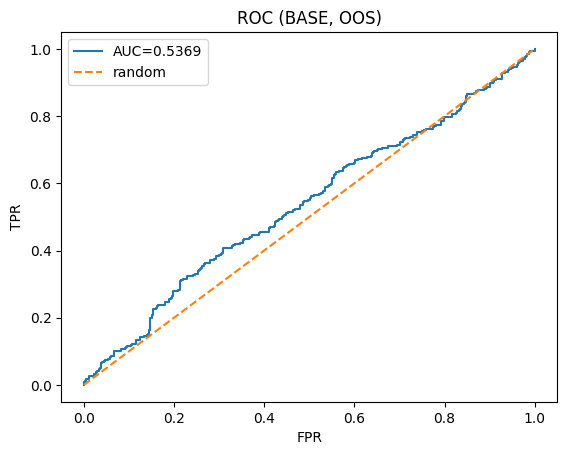

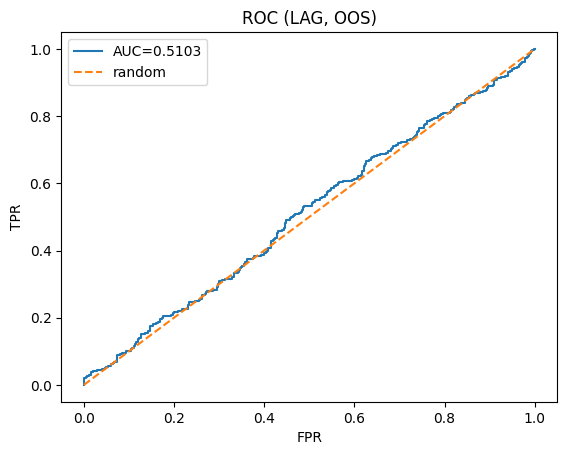

AUC BASE: 0.5368700172705546
AUC LAG : 0.5103419802406247


In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def oos_proba_logreg(df: pd.DataFrame, features: list[str], target: str = "y_up_1d", n_splits: int = 5):
    d = df.copy()
    d["date"] = pd.to_datetime(d["date"], errors="coerce")
    d = d.sort_values("date", kind="stable").reset_index(drop=True)

    X = d[features].copy()
    y = pd.to_numeric(d[target], errors="coerce")

    m = y.notna() & X.notna().any(axis=1)
    X, y = X.loc[m].reset_index(drop=True), y.loc[m].astype(int).reset_index(drop=True)

    tscv = TimeSeriesSplit(n_splits=n_splits)

    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=3000, class_weight="balanced")),
    ])

    proba_oos = np.full(len(X), np.nan)
    for train_idx, test_idx in tscv.split(X):
        pipe.fit(X.iloc[train_idx], y.iloc[train_idx])
        proba_oos[test_idx] = pipe.predict_proba(X.iloc[test_idx])[:, 1]

    out = pd.DataFrame({"y": y, "p": proba_oos}).dropna()
    return out["y"].values, out["p"].values


def plot_roc(y, p, title="ROC"):
    auc = roc_auc_score(y, p)
    fpr, tpr, _ = roc_curve(y, p)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--", label="random")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(title)
    plt.legend()
    plt.show()
    return auc


y_b, p_b = oos_proba_logreg(df2, base_feats, n_splits=5)
auc_b = plot_roc(y_b, p_b, title="ROC (BASE, OOS)")

y_l, p_l = oos_proba_logreg(df_lag, lag_feats, n_splits=5)
auc_l = plot_roc(y_l, p_l, title="ROC (LAG, OOS)")

print("AUC BASE:", auc_b)
print("AUC LAG :", auc_l)